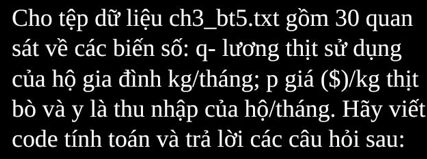

In [2]:
library(ggplot2)
library(lmtest)
library(urca)
library(sandwich)
library(car)
library(carData)
library(forecast)
library(tseries)
library(dummy)
library(seasonal)
library(hexView)
library(strucchange)
library(fBasics)

Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"package 'lmtest' was built under R version 4.2.2"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.2.2"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'urca' was built under R version 4.2.2"
Warning message:
"package 'sandwich' was built under R version 4.2.2"
Warning message:
"package 'car' was built under R version 4.2.2"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.2"
Warning message:
"package 'forecast' was built under R version 4.2.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'tseries' was built under R version 4.2.2"
dummy 0.1.3

dummyNews()

Warning message:
"package 'seasonal' was built under R version 4.2.2"
Warning messag

In [4]:
df <- readEViews("ch3_bt5.wf1")
df

Warning message in readEViews("ch3_bt5.wf1"):
"Skipping boilerplate variable
"
Warning message in readEViews("ch3_bt5.wf1"):
"Skipping boilerplate variable
"


Date,P,Q,Y
<date>,<dbl>,<dbl>,<dbl>
0001-01-01,10.763,11.6320,487.648
0002-01-01,13.033,12.0290,364.877
0003-01-01,9.244,8.9160,541.037
0004-01-01,4.605,33.9080,760.343
0005-01-01,13.045,4.5610,421.746
0006-01-01,7.706,17.5940,578.214
0007-01-01,7.405,18.8420,561.734
0008-01-01,7.519,11.6370,301.470
0009-01-01,8.764,7.6450,379.636


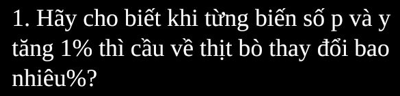

In [6]:
hq <- lm(data = df,log(Q)~log(Y)+log(P))
summary(hq)


Call:
lm(formula = log(Q) ~ log(Y) + log(P), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72529 -0.24963  0.00872  0.14688  0.67200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.1391     1.4077  -3.651  0.00111 ** 
log(Y)        1.4297     0.2275   6.285    1e-06 ***
log(P)       -0.5693     0.2137  -2.664  0.01285 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.392 on 27 degrees of freedom
Multiple R-squared:  0.6251,	Adjusted R-squared:  0.5973 
F-statistic: 22.51 on 2 and 27 DF,  p-value: 1.772e-06


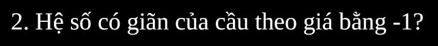

In [7]:
linearHypothesis(hq,c("log(P)=-1"))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,4.774200,NA,NA,NA,NA
2,27,4.149745,1,0.6244552,4.06297,0.05388568


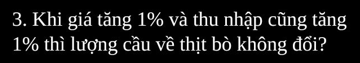

In [8]:
linearHypothesis(hq,c("log(P)=-log(Y)"))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,5.380488,NA,NA,NA,NA
2,27,4.149745,1,1.230743,8.007734,0.008682818


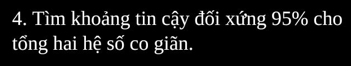

In [12]:
vcov(hq)

,(Intercept),log(Y),log(P)
(Intercept),1.98156993,-0.303604062,-0.079690259
log(Y),-0.30360406,0.051742449,-0.002479062
log(P),-0.07969026,-0.002479062,0.045655315


In [11]:
var2 <- vcov(hq)[2,2]
var3 <- vcov(hq)[3,3]
cov23 <- vcov(hq)[3,2]

se <- sqrt(var2+var3+2*cov23)
beta2 <- 1.4297
beta3 <- -0.5693

can_tren <- (beta2+beta3)+qt(0.975,length(df$P)-3)*se
can_duoi <- (beta2+beta3)-qt(0.975,length(df$P)-3)*se
print(can_tren)
print(can_duoi)

[1] 1.484236
[1] 0.2365637


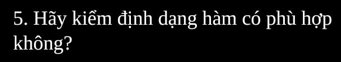

In [13]:
resettest(hq, power = c(2,3))


	RESET test

data:  hq
RESET = 0.18291, df1 = 2, df2 = 25, p-value = 0.8339


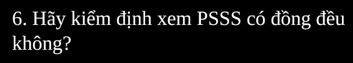

In [17]:
df$phandu <- resid(hq)
summary(lm(data = df, phandu ~ Y+P+I(Y^2)+I(P^2)+I(P*Y)))


Call:
lm(formula = phandu ~ Y + P + I(Y^2) + I(P^2) + I(P * Y), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71267 -0.23452 -0.02239  0.21620  0.69306 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -1.934e-01  1.522e+00  -0.127    0.900
Y            2.573e-03  5.446e-03   0.472    0.641
P           -6.273e-02  2.073e-01  -0.303    0.765
I(Y^2)      -1.729e-06  4.275e-06  -0.404    0.690
I(P^2)       7.211e-03  9.865e-03   0.731    0.472
I(P * Y)    -1.692e-04  3.535e-04  -0.479    0.637

Residual standard error: 0.4101 on 24 degrees of freedom
Multiple R-squared:  0.02747,	Adjusted R-squared:  -0.1751 
F-statistic: 0.1356 on 5 and 24 DF,  p-value: 0.9825


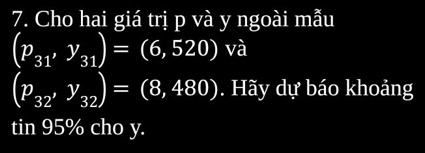

In [19]:
predic1 <- predict(hq,data.frame(P=6,Y=520),interval="confidence",level=0.95)
predic1

,fit,lwr,upr
1,2.781807,2.545146,3.018469


In [20]:
predic2 <- predict(hq,data.frame(P=8,Y=480),interval="confidence",level=0.95)
predic2

,fit,lwr,upr
1,2.503593,2.327861,2.679324
